In [13]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train_ready_for_model.csv")

In [3]:
test = pd.read_csv("test_ready_for_model.csv")

In [4]:
result = test[["Outlet_Identifier","Item_Identifier"]]

In [5]:
result["Item_Outlet_Sales"] = train.Item_Outlet_Sales.mean()

In [7]:
result.to_csv("res1.csv",index=False)

In [9]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import cross_validation, metrics

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)




In [10]:
[x for x in train.columns if x not in [target]+IDcol]

['Item_Fat_Content_Low Fat',
 'Item_Fat_Content_Regular',
 'Item_Type_Baking Goods',
 'Item_Type_Breads',
 'Item_Type_Breakfast',
 'Item_Type_Canned',
 'Item_Type_Dairy',
 'Item_Type_Frozen Foods',
 'Item_Type_Fruits and Vegetables',
 'Item_Type_Hard Drinks',
 'Item_Type_Health and Hygiene',
 'Item_Type_Household',
 'Item_Type_Meat',
 'Item_Type_Others',
 'Item_Type_Seafood',
 'Item_Type_Snack Foods',
 'Item_Type_Soft Drinks',
 'Item_Type_Starchy Foods',
 'Outlet_Identifier_OUT010',
 'Outlet_Identifier_OUT013',
 'Outlet_Identifier_OUT017',
 'Outlet_Identifier_OUT018',
 'Outlet_Identifier_OUT019',
 'Outlet_Identifier_OUT027',
 'Outlet_Identifier_OUT035',
 'Outlet_Identifier_OUT045',
 'Outlet_Identifier_OUT046',
 'Outlet_Identifier_OUT049',
 'Outlet_Size_High',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket

predictors :  ['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular', 'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m


Model Report
RMSE : 1127


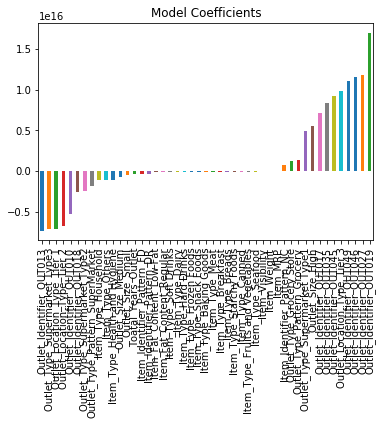

In [11]:
from sklearn.linear_model import LinearRegression
predictors = [x for x in train.columns if x not in [target]+IDcol]
print("predictors : ",predictors)
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'res2.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

predictors :  ['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular', 'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m


Model Report
RMSE : 1177


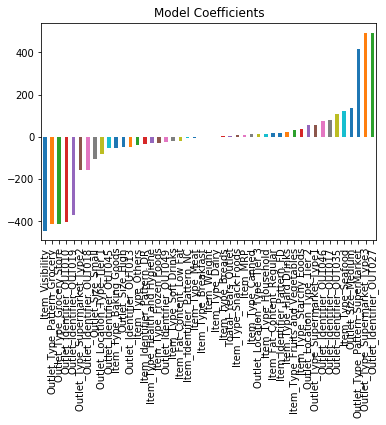

In [12]:
from sklearn.linear_model import Ridge
predictors = [x for x in train.columns if x not in [target]+IDcol]
print("predictors : ",predictors)
# print predictors
alg1 = Ridge(alpha = 0.5,normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'res3.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1144


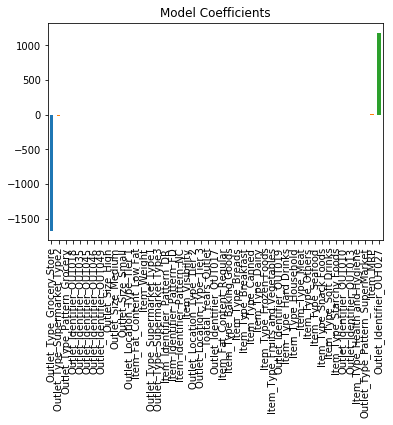

In [14]:
from sklearn.linear_model import Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = Lasso(alpha = 1,normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'res4.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1127


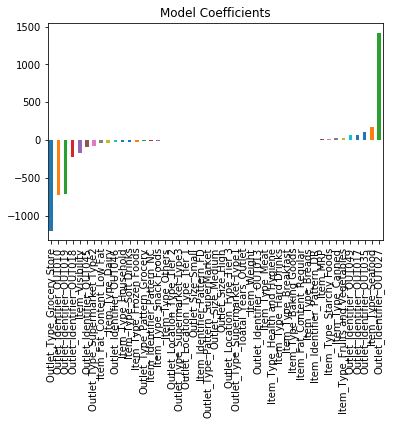

In [15]:
from sklearn.linear_model import ElasticNet
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = ElasticNet(alpha=0.01,l1_ratio=1,normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'res5.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [32]:
from sklearn.neighbors import KNeighborsRegressor


In [16]:
from sklearn.neighbors import KNeighborsRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
for i in range(1,30):
    alg1 = KNeighborsRegressor(n_neighbors=i)
    modelfit(alg1, train, test, predictors, target, IDcol, 'res6.csv')
#coef1 = pd.Series(alg1.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 0

Model Report
RMSE : 780.1

Model Report
RMSE : 904.2

Model Report
RMSE : 972.1

Model Report
RMSE : 1016

Model Report
RMSE : 1045

Model Report
RMSE : 1069

Model Report
RMSE : 1085

Model Report
RMSE : 1101

Model Report
RMSE : 1117

Model Report
RMSE : 1131

Model Report
RMSE : 1145

Model Report
RMSE : 1162

Model Report
RMSE : 1171

Model Report
RMSE : 1186

Model Report
RMSE : 1195

Model Report
RMSE : 1205

Model Report
RMSE : 1215

Model Report
RMSE : 1221

Model Report
RMSE : 1229

Model Report
RMSE : 1237

Model Report
RMSE : 1243

Model Report
RMSE : 1248

Model Report
RMSE : 1251

Model Report
RMSE : 1256

Model Report
RMSE : 1260

Model Report
RMSE : 1266

Model Report
RMSE : 1269

Model Report
RMSE : 1273


In [18]:
alg1 = KNeighborsRegressor(n_neighbors=2)
modelfit(alg1, train, test, predictors, target, IDcol, 'knn_2_res6.csv')


Model Report
RMSE : 780.1


In [19]:
alg1 = KNeighborsRegressor(n_neighbors=3)
modelfit(alg1, train, test, predictors, target, IDcol, 'knn_3_res6.csv')


Model Report
RMSE : 904.2


In [20]:
alg1 = KNeighborsRegressor(n_neighbors=4)
modelfit(alg1, train, test, predictors, target, IDcol, 'knn_4_res6.csv')


Model Report
RMSE : 972.1


In [21]:
alg1 = KNeighborsRegressor(n_neighbors=5)
modelfit(alg1, train, test, predictors, target, IDcol, 'knn_5_res6.csv')


Model Report
RMSE : 1016


In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg1, train, test, predictors, target, IDcol, 'decisionres7.csv')
#coef1 = pd.Series(alg1.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1059


In [26]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = RandomForestRegressor(n_estimators=500,max_depth=20, min_samples_leaf=100)
modelfit(alg1, train, test, predictors, target, IDcol, 'Randomres8.csv')
#coef1 = pd.Series(alg1.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1062


In [27]:
from sklearn.ensemble import AdaBoostRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = AdaBoostRegressor(n_estimators=50)
modelfit(alg1, train, test, predictors, target, IDcol, 'res9.csv')
#coef1 = pd.Series(alg1.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1312


In [30]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

param_dist = {
 'n_estimators': [50, 100,200,300],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

pre_gs_inst = GridSearchCV(AdaBoostRegressor(),
 param_grid = param_dist,
 cv=3,
 n_jobs=-1)

pre_gs_inst.fit(train[predictors], train[target])

GridSearchCV(cv=3, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1], 'loss': ['linear', 'square', 'exponential']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
pre_gs_inst.best_estimator_

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='exponential',
         n_estimators=50, random_state=None)


Model Report
RMSE : 1104


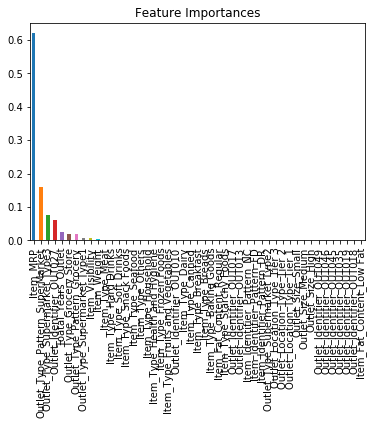

In [32]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='exponential',
         n_estimators=100, random_state=None)
modelfit(alg5, train, test, predictors, target, IDcol, 'res10.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

In [33]:
coef5.index[:5]

Index(['Item_MRP', 'Outlet_Type_Pattern_SuperMarket',
       'Outlet_Type_Supermarket Type3', 'Outlet_Identifier_OUT027',
       'Toatal_Years_Outlet'],
      dtype='object')


Model Report
RMSE : 1106


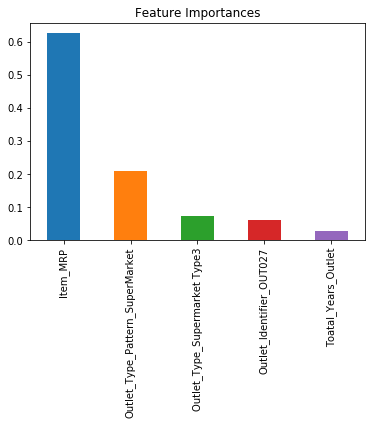

In [34]:
predictors=coef5.index[:5]
alg5 = AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='exponential',
         n_estimators=100, random_state=None)
modelfit(alg5, train, test, predictors, target, IDcol, 'res10.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 893.9


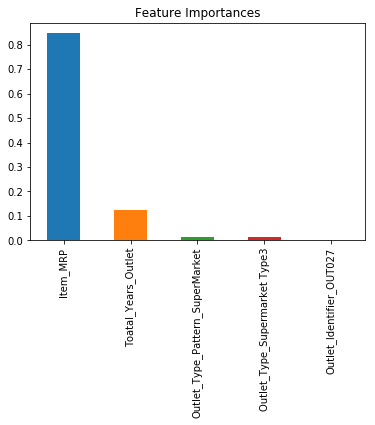

In [35]:
import xgboost as xgb
predictors = coef5.index[:7]
alg5 = xgb.XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.05)
modelfit(alg5, train, test, predictors, target, IDcol, 'res11.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

In [61]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_dist = {
 'n_estimators': [50, 100,200,300],
 'learning_rate' : [0.01,0.05,0.1,0.3,1]
 }

pre_gs_inst = GridSearchCV(xgb.XGBRegressor(),
 param_grid = param_dist,
 cv=3,
 n_jobs=-1)

pre_gs_inst.fit(train[predictors], train[target])

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [62]:
pre_gs_inst.best_params_

{'n_estimators': 100, 'learning_rate': 0.05}

In [39]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
import numpy as np

clf1 = KNeighborsRegressor(n_neighbors=1)
clf2 = RandomForestRegressor(random_state=1)
clf3 = DecisionTreeRegressor()
lr = LinearRegression()
sclf = StackingRegressor(regressors=[clf1, clf2, clf3], 
                          meta_regressor=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Decision Tree',
                       'Stacking Regressor']):

    scores = model_selection.cross_val_score(clf, train[predictors], train[target],
                                              cv=30)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.20 (+/- 0.11) [KNN]
Accuracy: 0.43 (+/- 0.08) [Random Forest]
Accuracy: 0.19 (+/- 0.12) [Decision Tree]
Accuracy: 0.19 (+/- 0.12) [Stacking Regressor]


In [40]:
from sklearn.model_selection import GridSearchCV
params = {}
grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=50,
                    refit=True)

In [41]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
grid.fit(train[predictors], train[target])

for params, mean_score, scores in grid.grid_scores_:
        print("%0.3f +/- %0.2f %r"
              % (mean_score, scores.std() / 2.0, params))


0.253 +/- 0.10 {}


In [42]:
test[target] = grid.predict(test[predictors])
IDcol.append(target)
submission = pd.DataFrame({ x: test[x] for x in IDcol})
submission.to_csv("res_stack.csv", index=False)

In [37]:
!pip install mlxtend

    100% |████████████████████████████████| 1.3MB 1.9MB/s ta 0:00:01
tensorboard 1.10.0 has requirement werkzeug>=0.11.10, but you'll have werkzeug 0.11.2 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
